In [7]:
from langgraph.graph import Graph
from langgraph.graph import StateGraph
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
langgraph->orchestration->pipeline

In [ ]:
langgraph->nodes,edges,State
node->funtions
edage-> connectivity between nodes(funtions)

In [8]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")

In [10]:
llm.invoke("hi").content

'Hi there! How can I help you today?'

In [11]:
def LLM(input):
    llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")
    response=llm.invoke(input).content
    return response
    

In [12]:
def Counter_Token(input):
    token=input.split()
    token_number=len(token)
    response=f"total number of token in the generated output {token_number}"
    return response
    

In [15]:
workflow=Graph()

In [16]:
workflow.add_node("MY LLM",LLM)

In [17]:
workflow.add_node("Token Counter",Counter_Token)

In [18]:
workflow.add_edge("MY LLM", "Token Counter")

In [19]:
workflow.set_entry_point("MY LLM")
workflow.set_finish_point("Token Counter")

In [20]:
app=workflow.compile()

In [21]:
from IPython.display import Image, display

In [22]:
app.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=<class 'langgraph.graph.graph.LangGraphInput'>, metadata=None), 'MY LLM': Node(id='MY LLM', name='MY LLM', data=MY LLM(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'Token Counter': Node(id='Token Counter', name='Token Counter', data=Token Counter(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=<class 'langgraph.graph.graph.LangGraphOutput'>, metadata=None)}, edges=[Edge(source='MY LLM', target='Token Counter', data=None, conditional=False), Edge(source='Token Counter', target='__end__', data=None, conditional=False), Edge(source='__start__', target='MY LLM', data=None, conditional=False)])

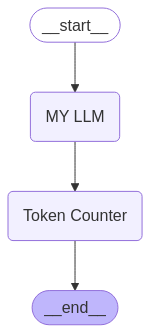

In [ ]:
display(Image(app.get_graph().draw_mermaid_png())) 

In [24]:
app.invoke("what is a agentic ai explain me in very detailed manner?")

'total number of token in the generated output 584'

In [26]:
for output in app.stream("what is a agentic ai explain me in very detailed manner?"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from MY LLM
_______
Agentic AI refers to artificial intelligence systems designed to act autonomously and independently, exhibiting a sense of agency.  This means they can make decisions, take actions, and pursue goals without constant human intervention.  It's a significant leap from reactive or assistive AI, which simply respond to inputs or automate pre-defined tasks.  Let's break down the key aspects:

**1. Autonomy:** This is the cornerstone of agentic AI.  These systems aren't just executing pre-programmed instructions; they have a degree of freedom in how they achieve their objectives.  They can adapt to changing circumstances, learn from experience, and even formulate new strategies. This autonomy can range from simple decision-making within a defined scope (like a self-driving car navigating a route) to more complex, open-ended problem-solving.

**2. Goal-Oriented Behavior:** Agentic AI systems are driven by goals. These goals can be explicitly programmed by hum

In [27]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [30]:
loader=DirectoryLoader("../data",glob="./*.txt",loader_cls=TextLoader)
docs=loader.load()
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=500,
    chunk_overlap=200
)
new_docs = text_splitter.split_documents(documents=docs)
doc_strings = [doc.page_content for doc in new_docs]

In [31]:
doc_strings

['Madam Speaker, Madam Vice President, our First Lady and Second Gentleman. Members of Congress and the Cabinet. Justices of the Supreme Court. My fellow Americans.  \n\nLast year COVID-19 kept us apart. This year we are finally together again. \n\nTonight, we meet as Democrats Republicans and Independents. But most importantly as Americans. \n\nWith a duty to one another to the American people to the Constitution. \n\nAnd with an unwavering resolve that freedom will always triumph over tyranny.',
 'With a duty to one another to the American people to the Constitution. \n\nAnd with an unwavering resolve that freedom will always triumph over tyranny. \n\nSix days ago, Russia’s Vladimir Putin sought to shake the foundations of the free world thinking he could make it bend to his menacing ways. But he badly miscalculated. \n\nHe thought he could roll into Ukraine and the world would roll over. Instead he met a wall of strength he never imagined. \n\nHe met the Ukrainian people.',
 'He tho

In [32]:
db = Chroma.from_documents(new_docs, embeddings)

retriever = db.as_retriever(search_kwargs={"k": 3})

In [33]:
query = "why scientist was working hard for what kind of vaccines?"
docs = retriever.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)

C:\Users\sunny\AppData\Local\Temp\ipykernel_79328\1463751420.py:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents(query)


{'source': '..\\data\\state_of_the_union.txt'}
The scientists are working hard to get that done and we’ll be ready with plenty of vaccines when they do. 

We’re also ready with anti-viral treatments. If you get COVID-19, the Pfizer pill reduces your chances of ending up in the hospital by 90%.  

We’ve ordered more of these pills than anyone in the world. And Pfizer is working overtime to get us 1 Million pills this month and more than double that next month.


In [34]:
for doc in docs:
    print(doc)

page_content='The scientists are working hard to get that done and we’ll be ready with plenty of vaccines when they do. 

We’re also ready with anti-viral treatments. If you get COVID-19, the Pfizer pill reduces your chances of ending up in the hospital by 90%.  

We’ve ordered more of these pills than anyone in the world. And Pfizer is working overtime to get us 1 Million pills this month and more than double that next month.' metadata={'source': '..\\data\\state_of_the_union.txt'}
page_content='We achieved this because we provided free vaccines, treatments, tests, and masks. 

Of course, continuing this costs money. 

I will soon send Congress a request. 

The vast majority of Americans have used these tools and may want to again, so I expect Congress to pass it quickly.   

Fourth, we will continue vaccinating the world.     

We’ve sent 475 Million vaccine doses to 112 countries, more than any other nation. 

And we won’t stop.' metadata={'source': '..\\data\\state_of_the_union.txt

In [75]:
AgentState={}

In [76]:
AgentState["messages"]=[]

In [77]:
AgentState

{'messages': []}

In [45]:
AgentState["messages"].append("hi")

In [47]:
AgentState["messages"].append("how are you?")

In [49]:
AgentState["messages"].append("what are you doing?")

In [50]:
# We are flowing this state across the different different nodes inside the langgraph workflow
AgentState

{'messages': ['hi', 'how are you?', 'what are you doing?']}

In [78]:
AgentState

{'messages': []}

In [79]:
def function_1(AgentState):
    message=AgentState["messages"]
    
    question=message[-1]
    
    complete_prompt="Your task is to provide only the brief answer based on the user query. \
        Don't include too much reasoning. Following is the user query: " + question
    
    response = llm.invoke(complete_prompt)
    
    AgentState['messages'].append(response.content) # appending LLM call response to the AgentState
    
    #print(AgentState)
    
    return AgentState
   
def function_2(AgentState):
    messages = AgentState['messages']
    
    question = messages[0] ## Fetching the user question
    
    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return result
    

In [80]:
workflow=Graph()
workflow.add_node("LLM", function_1)
workflow.add_node("RAGtool", function_2)
workflow.add_edge('LLM', 'RAGtool')
workflow.set_entry_point("LLM")
workflow.set_finish_point("RAGtool")
app2 = workflow.compile()


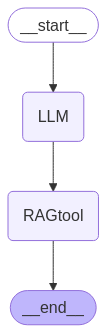

In [81]:
display(Image(app2.get_graph().draw_mermaid_png())) 

In [82]:
app2.invoke({"messages":["what is a meaning of 'cancer from prolonged exposure to burn pits ravaged Heath’s lungs and body'?"]})

"Heath's cancer, which was caused by being around burn pits for a long time, severely damaged his lungs and body."

In [83]:
for output in app2.stream({"messages":["what is a meaning of 'cancer from prolonged exposure to burn pits ravaged Heath’s lungs and body'?"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from LLM
_______
{'messages': ["what is a meaning of 'cancer from prolonged exposure to burn pits ravaged Heath’s lungs and body'?", "Heath's lungs and body were severely damaged by cancer caused by prolonged exposure to burn pits."]}


here is output from RAGtool
_______
Heath's lungs and body were severely damaged by cancer that developed due to long-term exposure to burn pits.


